In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import (ImageList, PointsItemList, get_transforms, ResizeMethod, open_image, Tensor, 
                           tensor, Image, imagenet_stats, Flatten, cnn_learner, models)
from fastprogress import progress_bar
import numpy as np
import pandas as pd
import torch.nn as nn
from torch.nn.functional import mse_loss

In [3]:
images_path = '../data/resized_images'
labels_path = '../data/resized_labels.csv'
target_size = 640

In [4]:
y = pd.read_csv(labels_path, index_col='filename')

In [5]:
def get_y_func(x):
    filename = str(x).split('/')[-1]
    coord_list = []
    coords = list(y.loc[filename])
    for i in range(len(coords)//2):
        coord_list.append([coords[i*2+1],coords[i*2]])
    return tensor(coord_list)

In [6]:
transforms = get_transforms(do_flip=True, max_zoom=1.1, max_warp=0.01, max_rotate=45) 

In [7]:
data = (
    PointsItemList
        .from_folder(images_path)
        .split_by_rand_pct(0.15)
        .label_from_func(get_y_func)
        .transform(
            transforms,
            size = 640,
            tfm_y=True, 
            remove_out=False, 
            padding_mode='border', 
            resize_method=ResizeMethod.PAD
        )
        .databunch(bs=16)
        .normalize(imagenet_stats)
)

In [8]:
data.x[0].data.shape

torch.Size([3, 640, 640])

In [9]:
data.y[0].data.shape

torch.Size([11, 2])

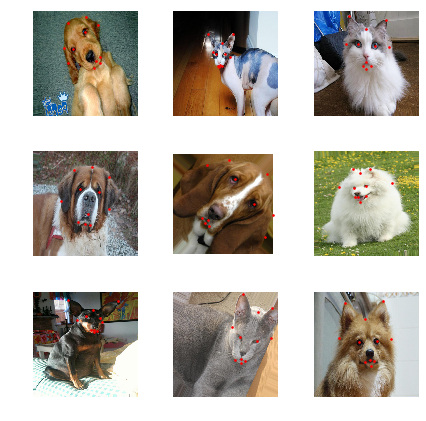

In [10]:
data.show_batch(3, figsize=(6,6))

In [11]:
class Reshape(nn.Module):
    def __init__(self, *args):
        super(Reshape, self).__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)

In [12]:
head_reg = nn.Sequential(
    Flatten(), 
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512*7*7, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256, 42),
    Reshape(11, 2),
    nn.Tanh()
)    

In [13]:
class MSELossFlat(nn.MSELoss):
    def forward(self, input:Tensor, target:Tensor):
        return super().forward(input.view(-1), target.view(-1)) 

mse_loss_flat = MSELossFlat()

learn = cnn_learner(
    data, 
    models.resnet34, 
#     custom_head=head_reg, 
    loss_func=mse_loss_flat
)

In [14]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,time
0,0.696738,0.189388,02:54
1,0.150903,0.097099,02:53
2,0.122416,0.086944,02:53
3,0.107636,0.090037,02:53
4,0.089728,0.079842,02:53


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anacond

KeyboardInterrupt: 